<a href="https://colab.research.google.com/github/ANIRVANJENA/ANIRVANJENA/blob/main/Stock_prediction_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model

In [ ]:
# Fetch data using yfinance
symbol = 'RELIANCE.NS'  # Reliance Industries Limited stock symbol on NSE
data = yf.download(symbol, start='2010-01-01', end='2024-01-01')

# Display the first few rows
print(data.head())

# Use only the 'Close' column for prediction
data = data[['Close']]

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  498.814209  498.814209  467.155457  491.682404  440.421997   
2010-01-05  525.695618  525.695618  487.065033  489.488007  438.456329   
2010-01-06  493.693939  500.368591  489.465149  497.397003  445.540771   
2010-01-07  497.397003  509.740479  492.825348  505.648834  452.932312   
2010-01-08  506.540314  509.191895  501.054321  504.323059  451.744720   

              Volume  
Date                  
2010-01-04  38323043  
2010-01-05  10696412  
2010-01-06  11845880  
2010-01-07  13098960  
2010-01-08   7555074  


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the training data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 50
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape data for LSTM model
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=1)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual values
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 [==============================] - 2s 17ms/step


In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test_scaled) ** 2)))
print(f'RMSE: {rmse}')

# Visualize the results
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Actual', 'Predicted'])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()

RMSE: 201.86693513072075


ValueError: Length of values (641) does not match length of index (691)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=20)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual values
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test_scaled) ** 2)))
print(f'RMSE: {rmse}')

# Adjust the length of the predictions DataFrame
valid = data[train_size + seq_length:]
valid['Predictions'] = predictions

Epoch 1/20
2713/2713 [==============================] - 78s 29ms/step - loss: 0.0012
Epoch 2/20
2713/2713 [==============================] - 80s 30ms/step - loss: 0.0011
Epoch 3/20
2713/2713 [==============================] - 81s 30ms/step - loss: 0.0010
Epoch 4/20
2713/2713 [==============================] - 79s 29ms/step - loss: 9.8981e-04
Epoch 5/20
2713/2713 [==============================] - 75s 28ms/step - loss: 8.1684e-04
Epoch 6/20
2713/2713 [==============================] - 75s 28ms/step - loss: 8.3678e-04
Epoch 7/20
2713/2713 [==============================] - 75s 27ms/step - loss: 7.2626e-04
Epoch 8/20
2713/2713 [==============================] - 76s 28ms/step - loss: 7.1834e-04
Epoch 9/20
2713/2713 [==============================] - 74s 27ms/step - loss: 7.2547e-04
Epoch 10/20
2713/2713 [==============================] - 73s 27ms/step - loss: 7.2790e-04
Epoch 11/20
2713/2713 [==============================] - 74s 27ms/step - loss: 6.2127e-04
Epoch 12/20
2713/2713 [========

<ipython-input-7-da3913908537>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


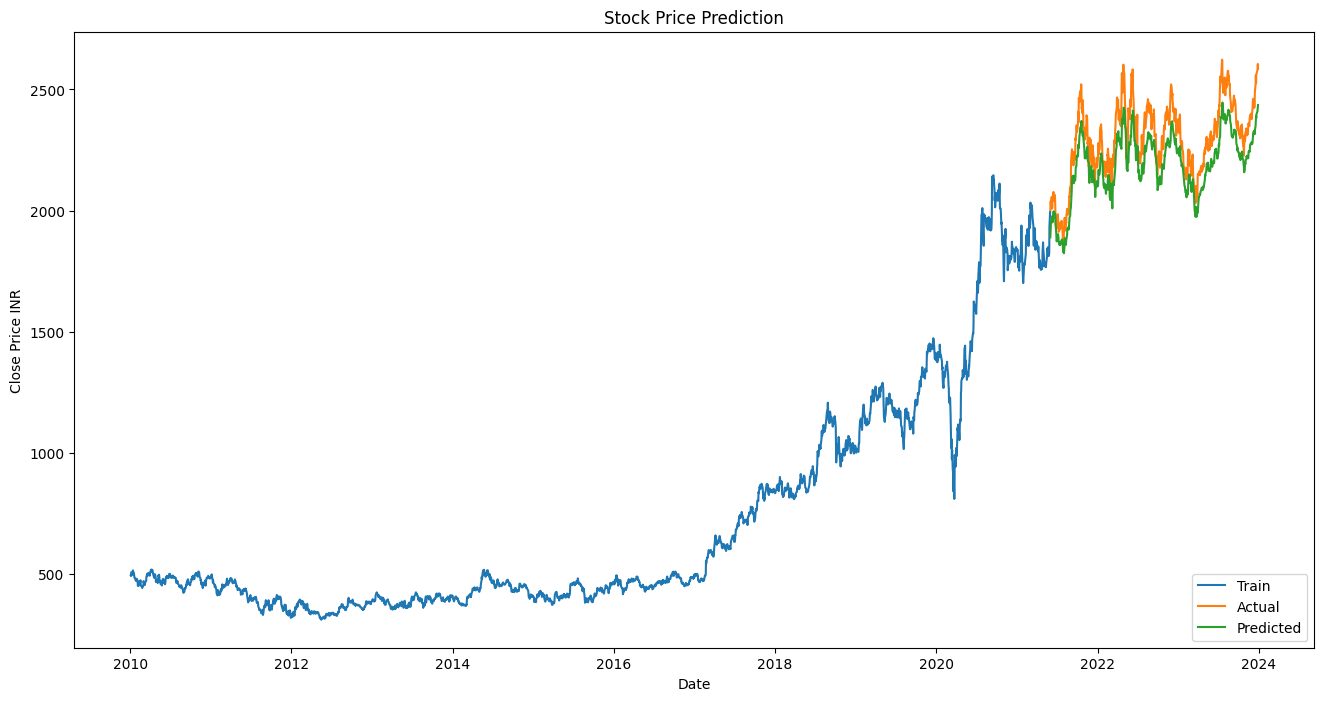

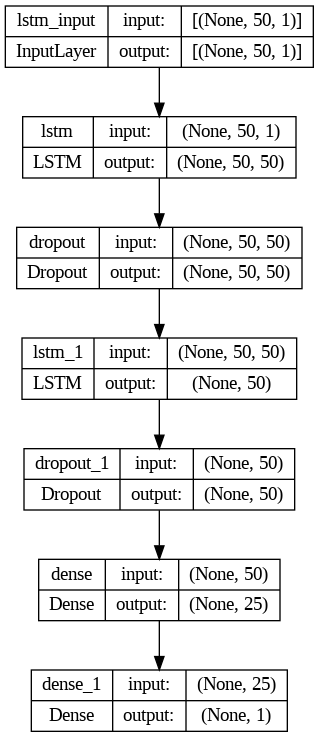

In [ ]:
# Visualize the results
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(data.index[:train_size + seq_length], data['Close'][:train_size + seq_length], label='Train')
plt.plot(valid.index, valid['Close'], label='Actual')
plt.plot(valid.index, valid['Predictions'], label='Predicted')
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()

# Visualize the neural network architecture
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch data using yfinance
symbol = 'RELIANCE.NS'  # Reliance Industries Limited stock symbol on NSE
data = yf.download(symbol, start='2010-01-01', end='2024-01-01')

# Use only the 'Close' column for prediction
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the training data
seq_length = 50

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

x_train, y_train = create_sequences(scaled_data, seq_length)

# Reshape data for LSTM model
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

# Make predictions
predictions = []
for i in range(len(data) - seq_length):
    x = scaled_data[i:i+seq_length][np.newaxis, :]
    prediction = model.predict(x)
    predictions.append(prediction[0][0])

# Inverse transform the predicted values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create a DataFrame to store the dates and corresponding predicted prices
dates = data.index[seq_length:]
predicted_prices_df = pd.DataFrame({'Date': dates, 'Predicted Close': predictions.flatten()})

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Close', color='blue')
plt.plot(predicted_prices_df['Date'], predicted_prices_df['Predicted Close'], label='Predicted Close', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plotting Actual and Predicted Prices for Last 50 Days
plt.figure(figsize=(14, 7))
plt.plot(data.index[-50:], data['Close'].tail(50), label='Actual Close', color='blue')
plt.plot(predicted_prices_df['Date'].tail(50), predicted_prices_df['Predicted Close'].tail(50), label='Predicted Close', color='red')
plt.title('Actual vs Predicted Close Price for Last 50 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plotting the Model Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
107/107 - 9s - loss: 0.0072 - 9s/epoch - 88ms/step
Epoch 2/10
107/107 - 6s - loss: 0.0019 - 6s/epoch - 55ms/step
Epoch 3/10
107/107 - 5s - loss: 0.0016 - 5s/epoch - 43ms/step
Epoch 4/10
107/107 - 5s - loss: 0.0015 - 5s/epoch - 48ms/step
Epoch 5/10
107/107 - 6s - loss: 0.0013 - 6s/epoch - 55ms/step
Epoch 6/10
107/107 - 5s - loss: 0.0013 - 5s/epoch - 43ms/step
Epoch 7/10
107/107 - 6s - loss: 0.0015 - 6s/epoch - 57ms/step
Epoch 8/10
107/107 - 5s - loss: 0.0011 - 5s/epoch - 45ms/step
Epoch 9/10
107/107 - 5s - loss: 0.0012 - 5s/epoch - 42ms/step
Epoch 10/10
107/107 - 7s - loss: 0.0011 - 7s/epoch - 62ms/step
1/1 [==============================] - 0s 30ms/step
